<a href="https://colab.research.google.com/github/Mayurrathod1/Stock_Market_Forcasting/blob/main/Stock_Price_Forecasting__Average__Linear_Regression__Random_Forest__KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries for data manipulation, numerical operations, plotting, and stock data retrieval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Set the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Download historical data for the specified ticker and time period from Yahoo Finance
data = yf.download(ticker_symbol, start="2000-01-01", end="2023-12-31", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
df=pd.DataFrame(data)
df['Date'] = pd.to_datetime(df.index) # Assuming your index is Date column
df.index = df['Date'].dt.strftime('%Y-%m-%d')
df = df.drop(columns=['Date']) # Drop the original 'Date' column
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03,0.843076,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04,0.771997,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05,0.783293,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06,0.715509,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07,0.749401,0.888393,0.901786,0.852679,0.861607,460734400


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.108871,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28,192.636276,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  6037 non-null   float64
 1   (Close, AAPL)      6037 non-null   float64
 2   (High, AAPL)       6037 non-null   float64
 3   (Low, AAPL)        6037 non-null   float64
 4   (Open, AAPL)       6037 non-null   float64
 5   (Volume, AAPL)     6037 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.1+ KB


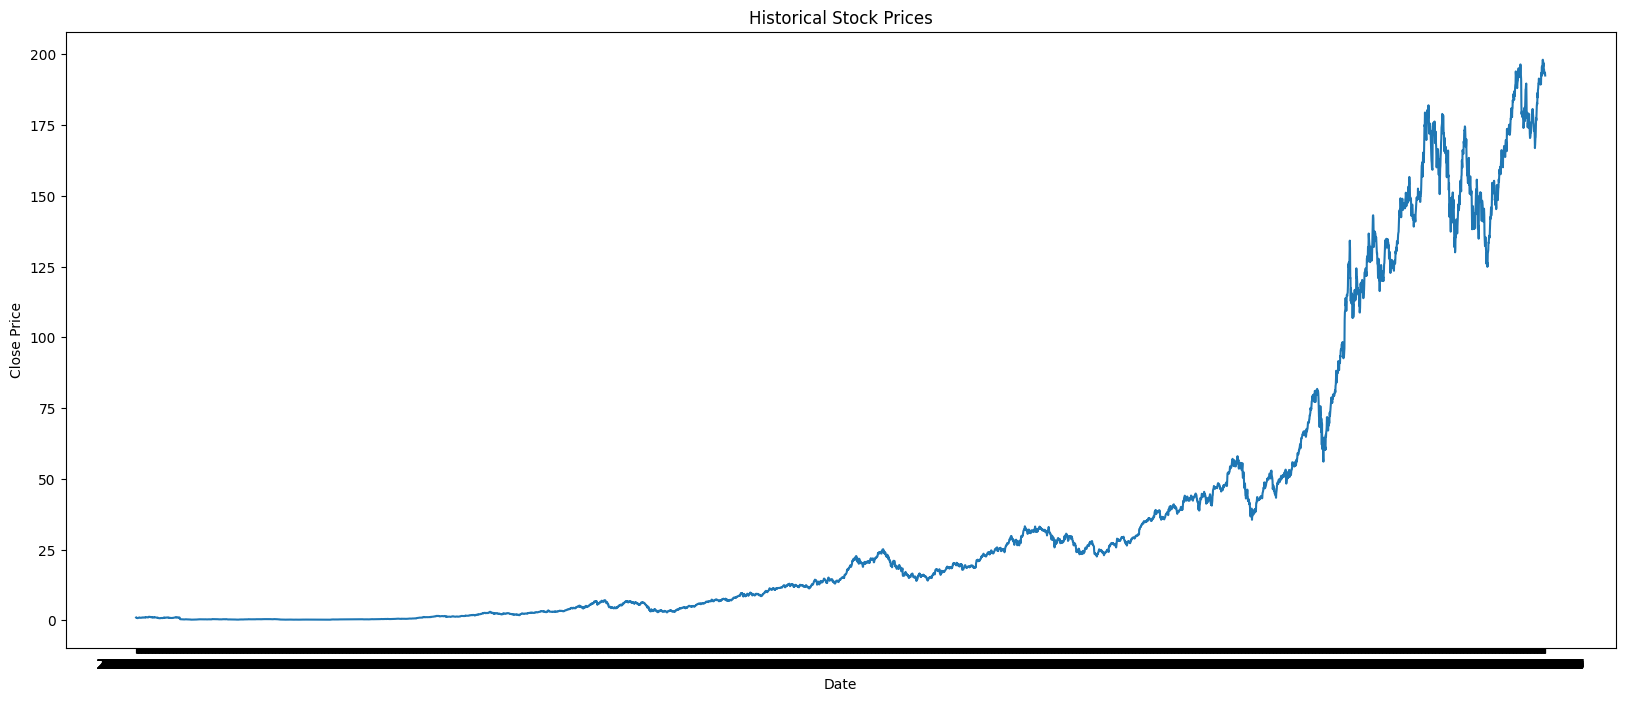

In [6]:
# Plotting
plt.figure(figsize=(20, 8))
plt.plot(df['Close'])
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [7]:
 # Drop the last row from df for X as Y[last] = NaN
X = df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].drop(df.index[-1])

# Shift the 'Close' column by -1 for Y, and drop the last row to match X as Y[last] = NaN
Y = df['Close'].shift(-1).drop(df.index[-1])

In [8]:
X.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-21,193.730896,194.679993,197.080002,193.500000,196.100006,46482500
2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.108871,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.208359,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28,192.636276,193.580002,194.660004,193.169998,194.139999,34049900


In [9]:
Y.tail()

Ticker,AAPL
Date,
2023-12-21,193.600006
2023-12-22,193.050003
2023-12-26,193.149994
2023-12-27,193.580002
2023-12-28,192.529999


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **1. Average**

  We will get average of previous 100 values and Predict it as forcast

In [11]:
# Define the split index for the 80-20 split
split_index = int(len(df) * 0.8)

Y_train1 = Y[:split_index]
Y_test1 = Y[split_index:]

# Calculate the rolling mean (average) of the previous 100 values
Y_predicted = Y.rolling(window=100).mean().shift(1)

# Ensure Y_predicted and Y_test1 have the same length by aligning the index
Y_predicted = Y_predicted.iloc[split_index:] # Select only split_index onwards

Y_predicted.head()

Ticker,AAPL
Date,
2019-03-15,43.883150
2019-03-18,43.804925
2019-03-19,43.719625
2019-03-20,43.633200
2019-03-21,43.583200


In [12]:
Y_predicted.tail()

Ticker,AAPL
Date,
2023-12-21,181.758101
2023-12-22,181.768301
2023-12-26,181.787101
2023-12-27,181.898701
2023-12-28,182.046001


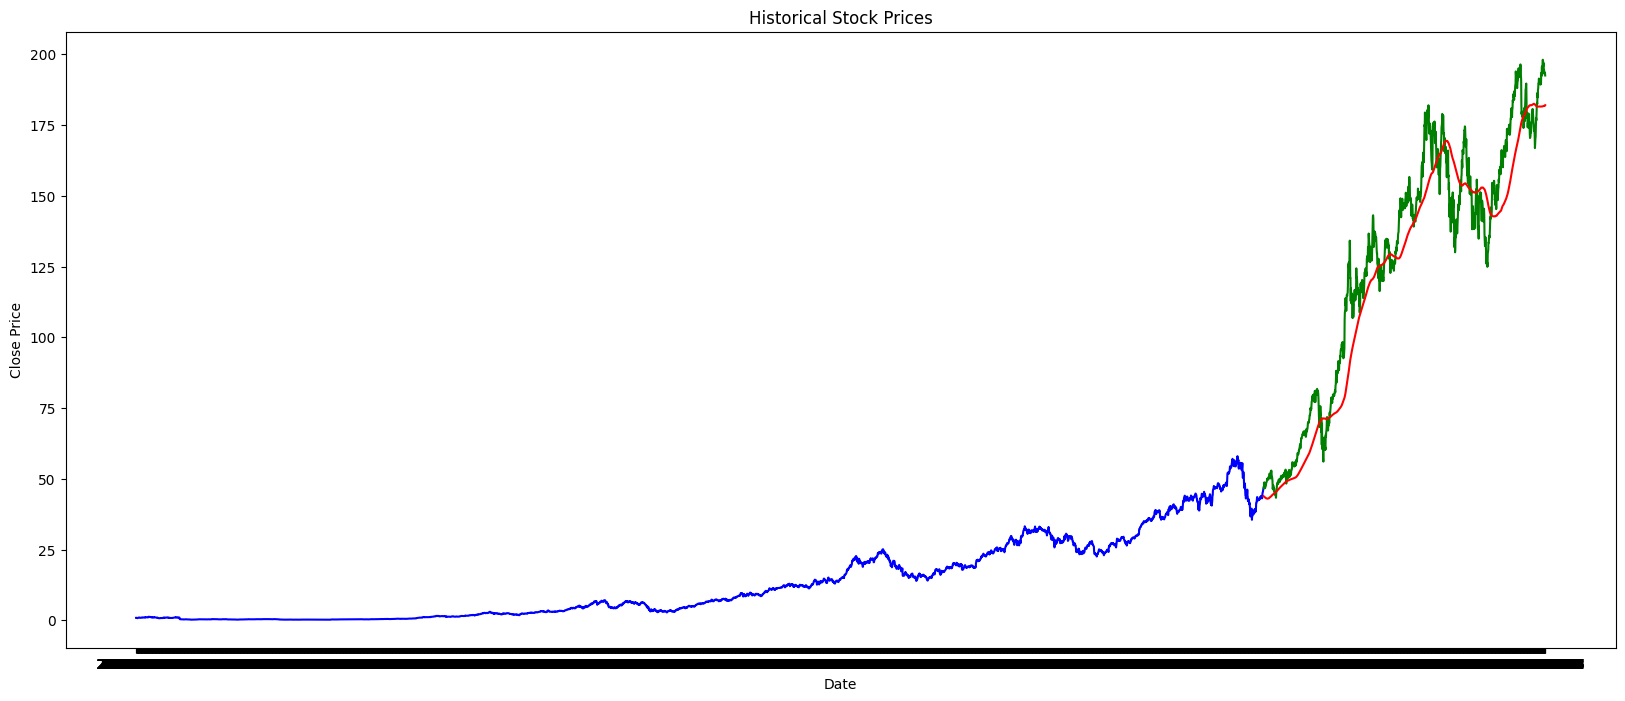

In [13]:
# Plotting
plt.figure(figsize=(20, 8))

# Plot the first 80% of Close prices in blue
plt.plot(Y_train1, color='blue', label='Close Price (First 80%)')

# Plot the remaining 20% of Close prices in yellow
plt.plot(Y_test1, color='green', label='Close Price (Last 20%)')

plt.plot(Y_predicted, color='red', label='Predicted')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [14]:
# R-squared Score
r2_testa = r2_score(Y_test1, Y_predicted)

# Root Mean Squared Error (RMSE)
rmse_testa = np.sqrt(mean_squared_error(Y_test1, Y_predicted))

print(f"R-squared on Testing Data: {r2_testa}")
print(f"RMSE on Testing Data: {rmse_testa}")

R-squared on Testing Data: 0.917017196240545
RMSE on Testing Data: 12.756996265190686


# **2. Linear Regression**

  In this method, We will preform linear regression on our dataset. Test values will be predicted as a linear combination of previous 100 days values

In [15]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
# R-squared Score
r2_trainl = r2_score(Y_train, linear_model.predict(X_train))
r2_testl = r2_score(Y_test, linear_model.predict(X_test))

# Root Mean Squared Error (RMSE)
rmse_trainl = np.sqrt(mean_squared_error(Y_train, linear_model.predict(X_train)))
rmse_testl = np.sqrt(mean_squared_error(Y_test, linear_model.predict(X_test)))

print(f"R-squared on Training Data: {r2_trainl}")
print(f"R-squared on Testing Data: {r2_testl}")
print(f"RMSE on Training Data: {rmse_trainl}")
print(f"RMSE on Testing Data: {rmse_testl}")

R-squared on Training Data: 0.9995097909296622
R-squared on Testing Data: 0.999569278613428
RMSE on Training Data: 1.128818369617014
RMSE on Testing Data: 1.0645808206397127


In [17]:
# Input values to predict the stock price
data = np.array([[192.848206, 193.580002, 194.660004, 193.169998, 194.139999, 34049900]])

# Make predictions using the trained model
predicted_stock_price = linear_model.predict(data)

# Access the actual stock price as a scalar value using .iloc and to_numpy()
actual_stock_price = df.iloc[-1]['Close'].to_numpy()[0]

# Print the results in the desired format
print(f"Predicted Stock Price: {predicted_stock_price[0][0]}")
print(f"Actual Stock Price: {actual_stock_price}")

Predicted Stock Price: 193.95310873945073
Actual Stock Price: 192.52999877929688


In [18]:
# Predict the values on test data
linear_prediction = linear_model.predict(X_test)

# Flatten the test and prediction arrays
Y_testl = Y_test.values.flatten()
linear_prediction = linear_prediction.flatten()

# Create DataFrame with actual and predicted close prices
valid_linear = pd.DataFrame({'Actual Close Price': Y_testl, 'Predicted Close Price': linear_prediction})

# If 'dates' variable was successfully created, set it as the index
if 'dates' in locals():
    valid_linear.index = dates

# Display the DataFrame
valid_linear.head(10)

,Actual Close Price,Predicted Close Price
0,53.160000,52.806539
1,148.910004,148.807822
2,27.757500,27.556351
3,2.377143,2.441739
4,12.236429,12.129710
5,27.594999,28.169968
6,83.364998,82.930843
7,6.513214,6.573943
8,12.841429,12.610343
9,1.368214,1.366958


# **3. Random Forest Regression**
The model will leverage an ensemble of decision trees to make predictions. By averaging the predictions from each tree, Random Forest aims to provide a robust forecast that captures both linear and non-linear patterns in the data.

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Build the Random forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model
rf_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [20]:
# R-squared Score
r2_trainr = r2_score(Y_train, rf_model.predict(X_train))
r2_testr = r2_score(Y_test, rf_model.predict(X_test))

# Root Mean Squared Error (RMSE)
rmse_trainr = np.sqrt(mean_squared_error(Y_train, rf_model.predict(X_train)))
rmse_testr = np.sqrt(mean_squared_error(Y_test, rf_model.predict(X_test)))

print(f"R-squared on Training Data: {r2_trainr}")
print(f"R-squared on Testing Data: {r2_testr}")
print(f"RMSE on Training Data: {rmse_trainr}")
print(f"RMSE on Testing Data: {rmse_testr}")

R-squared on Training Data: 0.999919654142282
R-squared on Testing Data: 0.999473955092799
RMSE on Training Data: 0.4569988871591833
RMSE on Testing Data: 1.1764997244052628


In [21]:
# Input values to predict the stock price
data = np.array([[192.848206, 193.580002, 194.660004, 193.169998, 194.139999, 34049900]])

# Make predictions using the trained model
predicted_stock_price = rf_model.predict(data)

# Access the actual stock price as a scalar value using .iloc and to_numpy()
actual_stock_price = df.iloc[-1]['Close'].to_numpy()[0]

# Print the results in the desired format
print(f"Predicted Stock Price: {predicted_stock_price[0]}")
print(f"Actual Stock Price: {actual_stock_price}")

Predicted Stock Price: 192.96830032348632
Actual Stock Price: 192.52999877929688


In [22]:
# Predict the values on test data
rf_prediction = rf_model.predict(X_test)

# Flatten the test and prediction arrays
Y_testr = Y_test.values.flatten()
rf_prediction = rf_prediction.flatten()

# Create DataFrame with actual and predicted close prices
valid_rf = pd.DataFrame({'Actual Close Price': Y_testr, 'Predicted Close Price': rf_prediction})

# If 'dates' variable was successfully created, set it as the index
if 'dates' in locals():
    valid_rf.index = dates

# Display the DataFrame
valid_rf.head(10)

,Actual Close Price,Predicted Close Price
0,53.160000,52.438325
1,148.910004,149.564000
2,27.757500,27.507975
3,2.377143,2.458832
4,12.236429,12.079054
5,27.594999,28.152700
6,83.364998,82.636049
7,6.513214,6.605586
8,12.841429,12.580643
9,1.368214,1.324950


# **4. K-Nearest Neighbors (KNN)**
In the KNN method, we will predict values based on the similarity of previous patterns in the dataset. To forecast each value, KNN identifies the closest past data points, determined by distance metrics. The forecast is made by averaging these "neighboring" values, effectively capturing trends that are similar in nature. This approach leverages historical patterns for prediction, making it responsive to changes and adaptable to various trends in the dataset.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

# Using the gridsearch to find the best paramenters
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
knn = neighbors.KNeighborsRegressor()
knn_model = GridSearchCV(knn, params, cv=5)

# train the model
knn_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]})

In [24]:
# R-squared Score
r2_traink = r2_score(Y_train, knn_model.predict(X_train))
r2_testk = r2_score(Y_test, knn_model.predict(X_test))

# Root Mean Squared Error (RMSE)
rmse_traink = np.sqrt(mean_squared_error(Y_train, knn_model.predict(X_train)))
rmse_testk = np.sqrt(mean_squared_error(Y_test, knn_model.predict(X_test)))

print(f"R-squared on Training Data: {r2_traink}")
print(f"R-squared on Testing Data: {r2_testk}")
print(f"RMSE on Training Data: {rmse_traink}")
print(f"RMSE on Testing Data: {rmse_testk}")

R-squared on Training Data: 0.6787691640789109
R-squared on Testing Data: 0.5948898147252796
RMSE on Training Data: 28.89628491548221
RMSE on Testing Data: 32.648783253802236


In [25]:
# Input values to predict the stock price
data = np.array([[192.848206, 193.580002, 194.660004, 193.169998, 194.139999, 34049900]])

# Make predictions using the trained model
predicted_stock_price = knn_model.predict(data)

# Access the actual stock price as a scalar value using .iloc and to_numpy()
actual_stock_price = df.iloc[-1]['Close'].to_numpy()[0]

# Print the results in the desired format
print(f"Predicted Stock Price: {predicted_stock_price[0][0]}")
print(f"Actual Stock Price: {actual_stock_price}")

Predicted Stock Price: 186.64350051879882
Actual Stock Price: 192.52999877929688


In [26]:
# Predict the values on test data
knn_prediction = knn_model.predict(X_test)

# Flatten the test and prediction arrays
Y_testk = Y_test.values.flatten()
knn_prediction = knn_prediction.flatten()

# Create DataFrame with actual and predicted close prices
valid_rf = pd.DataFrame({'Actual Close Price': Y_testk, 'Predicted Close Price': knn_prediction})

# If 'dates' variable was successfully created, set it as the index
if 'dates' in locals():
    valid_rf.index = dates

# Display the DataFrame
valid_rf.head(10)

,Actual Close Price,Predicted Close Price
0,53.160000,79.654786
1,148.910004,151.972124
2,27.757500,71.608500
3,2.377143,9.990032
4,12.236429,6.959667
5,27.594999,71.147376
6,83.364998,54.687535
7,6.513214,8.793112
8,12.841429,6.912803
9,1.368214,11.905107
